A partir de agora, usaremos Pyhton para analisar e/ou obter dados! 

## Formas de obtenção de dados:
* Arquivos estruturados: csv, json, txt, planilha de excel
* Web Scrapping: navegar por um site e extrair informações a partir da sua estrutura
* API: Forma de se comunicar com alguns softwares para pegar informações
* Banco de dados

### A partir de um xls:

Estabelecimentos de Saúde da Cidade de São Paulo

In [32]:
import matplotlib.pyplot as plt
import pandas as pd

#http://dados.prefeitura.sp.gov.br/dataset/cadastro-dos-estabelecimentos-de-saude/resource/86addd0c-ccce-46c3-9f3b-a454ce8a4234
#Guilherme Hiroki, Gabriel Dornelas

legendas = 'Leste Sul Norte Oeste Centro'.split()
dados = pd.read_excel('dados/deinfosacadsau2014.xls',
                      sheet_name='DEINFO_SA_CADSAU_2014')
print (dados.head())


   ID      LONG       LAT          SETCENS          AREAP  CODDIST  \
0   1 -46490063 -23522787  355030864000052  3550308005143       65   
1   2 -46773393 -23673297  355030819000016  3550308005232       19   
2   3 -46651898 -23531575  355030869000001  3550308005027       70   
3   4 -46454974 -23538945  355030837000019  3550308005202       36   
4   5 -46539564 -23599363  355030872000050  3550308005158       74   

        DISTRITO  CODSUBPREF             SUBPREF REGIAO5   ...      TELEFONE  \
0     PONTE RASA          22  ERMELINO MATARAZZO   Leste   ...    22800080.0   
1  CAPAO REDONDO          17         CAMPO LIMPO     Sul   ...    58742846.0   
2  SANTA CECILIA           9                  SE  Centro   ...    38260096.0   
3       ITAQUERA          27            ITAQUERA   Leste   ...    62860015.0   
4      SAO LUCAS          29       VILA PRUDENTE   Leste   ...           NaN   

         CEP            CNES SA_DEPADM     DEPADM  SA_TIPO  \
0  3680000.0  6393608.000000        

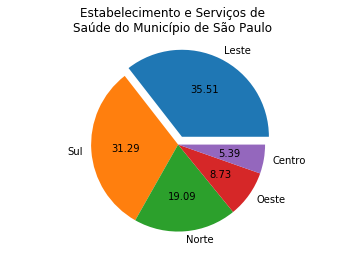

In [33]:
plt.axis('equal')
plt.pie(dados['REGIAO5'].value_counts(), autopct="%.2f",
        labels=legendas, explode = [0.1,0,0,0,0])
plt.suptitle("Estabelecimento e Serviços de\nSaúde do Município de São Paulo")

plt.show()

### A partir de um csv: 
Despesas dos deputados federais

In [34]:
#https://dadosabertos.camara.leg.br/swagger/api.html
#Celso Tomisaki, Claudio Jayme

dtf = pd.read_csv('dados/Ano-2017.csv', low_memory=False,delimiter=';', encoding='UTF-8', decimal=',')
dtf.head()

,txNomeParlamentar,idecadastro,nuCarteiraParlamentar,nuLegislatura,sgUF,sgPartido,codLegislatura,numSubCota,txtDescricao,numEspecificacaoSubCota,...,numMes,numAno,numParcela,txtPassageiro,txtTrecho,numLote,numRessarcimento,vlrRestituicao,nuDeputadoId,ideDocumento
0,ABEL MESQUITA JR.,178957.0,1.0,2015,RR,DEM,55.0,1,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,0,...,4,2017,0,NaN,NaN,1377952,5828.0,0,3074,6266962
1,ABEL MESQUITA JR.,178957.0,1.0,2015,RR,DEM,55.0,1,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,0,...,10,2017,0,NaN,NaN,1430312,5993.0,0,3074,6408821
2,ABEL MESQUITA JR.,178957.0,1.0,2015,RR,DEM,55.0,3,COMBUSTÍVEIS E LUBRIFICANTES.,1,...,5,2017,0,NaN,NaN,1393809,5869.0,0,3074,6306682
3,ABEL MESQUITA JR.,178957.0,1.0,2015,RR,DEM,55.0,3,COMBUSTÍVEIS E LUBRIFICANTES.,1,...,5,2017,0,NaN,NaN,1393809,5869.0,0,3074,6306518
4,ABEL MESQUITA JR.,178957.0,1.0,2015,RR,DEM,55.0,3,COMBUSTÍVEIS E LUBRIFICANTES.,1,...,5,2017,0,NaN,NaN,1393809,5869.0,0,3074,6306675


In [35]:
sum(dtf['vlrDocumento'])

181523611.26003507

### Strings e Acesso à Internet
* Vamos procurar onde estão as informações num texto == scraping
* Inicialmente iremos raspar o valor do café onde o preço está numa posição fixa
* Como conseguir raspar esse valor se a informação ficar mudando de posição?
* Iremos comprar o café apenas se o preço estiver abaixo de um valor, para isso deixaremos o programa repetir o acesso até o valor baixar

http://beans.itcarlow.ie/prices.html

In [1]:
import urllib.request
pagina = urllib.request.urlopen('http://beans.itcarlow.ie/prices.html')
texto = pagina.read().decode('utf8')

In [2]:
print(texto)

<html><head><title>Welcome to the Beans'R'Us Pricing Page</title>
<link rel="stylesheet" type="text/css" href="beansrus.css" />
</head><body>
<h2>Welcome to the Beans'R'Us Pricing Page</h2>
<p>Current price of coffee beans = <strong>$5.19</strong></p>
<p>Price valid for 15 minutes from Fri Apr 26 15:31:01 2019.</p>
</body></html>



O CEO quer apenas o preço! <br> 
O preço está imbutido no HTML!

## Dicionários
O dicionário em si consiste em relacionar uma chave a um valor específico. <br>
Diferentemente das listas, onde o índice é um número, dicionários utilizam
suas chaves como índice <br>
Para adicionar novos elementos basta fazer a atribuição:
* Se a chave já existe: o valor associado é alterado
* Se a chave não existe: a nova chave é adicionada

### Jogos da copa do mundo

In [4]:
import urllib.request
import json 

In [6]:
resp = urllib.request.urlopen('http://worldcup.sfg.io/matches').read()

In [21]:
print(resp)

b'[{"venue":"Moscow","location":"Luzhniki Stadium","status":"completed","time":"full-time","fifa_id":"300331503","weather":{"humidity":"43","temp_celsius":"17","temp_farenheit":"49","wind_speed":"6","description":"Partly Cloudy"},"attendance":"78011","officials":["Nestor PITANA","Hernan MAIDANA","Juan Pablo BELATTI","Sandro RICCI","Massimiliano IRRATI","Carlos ASTROZA","Mauro VIGLIANO","Daniele ORSATO","Emerson DE CARVALHO"],"stage_name":"First stage","home_team_country":"Russia","away_team_country":"Saudi Arabia","datetime":"2018-06-14T15:00:00Z","winner":"Russia","winner_code":"RUS","home_team":{"country":"Russia","code":"RUS","goals":5,"penalties":0},"away_team":{"country":"Saudi Arabia","code":"KSA","goals":0,"penalties":0},"home_team_events":[{"id":5,"type_of_event":"goal","player":"Iury GAZINSKY","time":"12\'"},{"id":1,"type_of_event":"substitution-in","player":"Denis CHERYSHEV","time":"24\'"},{"id":320,"type_of_event":"substitution-out","player":"Alan DZAGOEV","time":"24\'"},{"i

In [20]:
for jogo in json.loads(resp.decode('utf-8')):
    if jogo['status'] == 'completed':
        print(jogo['home_team']['country'], jogo['home_team']['goals'], 'x', 
              jogo['away_team']['country'], jogo['away_team']['goals'])


Russia 5 x Saudi Arabia 0
Egypt 0 x Uruguay 1
Morocco 0 x Iran 1
Portugal 3 x Spain 3
France 2 x Australia 1
Argentina 1 x Iceland 1
Peru 0 x Denmark 1
Croatia 2 x Nigeria 0
Costa Rica 0 x Serbia 1
Germany 0 x Mexico 1
Brazil 1 x Switzerland 1
Sweden 1 x Korea Republic 0
Belgium 3 x Panama 0
Tunisia 1 x England 2
Colombia 1 x Japan 2
Poland 1 x Senegal 2
Russia 3 x Egypt 1
Portugal 1 x Morocco 0
Uruguay 1 x Saudi Arabia 0
Iran 0 x Spain 1
Denmark 1 x Australia 1
France 1 x Peru 0
Argentina 0 x Croatia 3
Brazil 2 x Costa Rica 0
Nigeria 2 x Iceland 0
Serbia 1 x Switzerland 2
Belgium 5 x Tunisia 2
Korea Republic 1 x Mexico 2
Germany 2 x Sweden 1
England 6 x Panama 1
Japan 2 x Senegal 2
Poland 0 x Colombia 3
Uruguay 3 x Russia 0
Saudi Arabia 2 x Egypt 1
Spain 2 x Morocco 2
Iran 1 x Portugal 1
Denmark 0 x France 0
Australia 0 x Peru 2
Iceland 1 x Croatia 2
Nigeria 1 x Argentina 2
Korea Republic 2 x Germany 0
Mexico 0 x Sweden 3
Switzerland 2 x Costa Rica 2
Serbia 0 x Brazil 2
Japan 0 x Pola